In [14]:
from yo_fluq_ds import *
from tg.common.delivery.sagemaker import download_and_open_sagemaker_result, S3TrainingLogsLoader, TrainingLogsViewer
from datetime import datetime
from matplotlib import pyplot as plt



loader = S3TrainingLogsLoader('ps-data-science-sandbox', 'alt')
tlw = TrainingLogsViewer

def two_plots(sl, ax_1=None, ax_2=None):
    if ax_1 is None:
        _, ax = plt.subplots(1,2,figsize=(15,5))
        ax_1, ax_2 = ax[0], ax[1]
    tlw.draw_overfit(sl, 'roc_auc_score_display', 'roc_auc_score_test', ax=ax_1)
    tlw.get_metric_by_job(sl, 'roc_auc_score_test').plot(ax=ax_2)
    

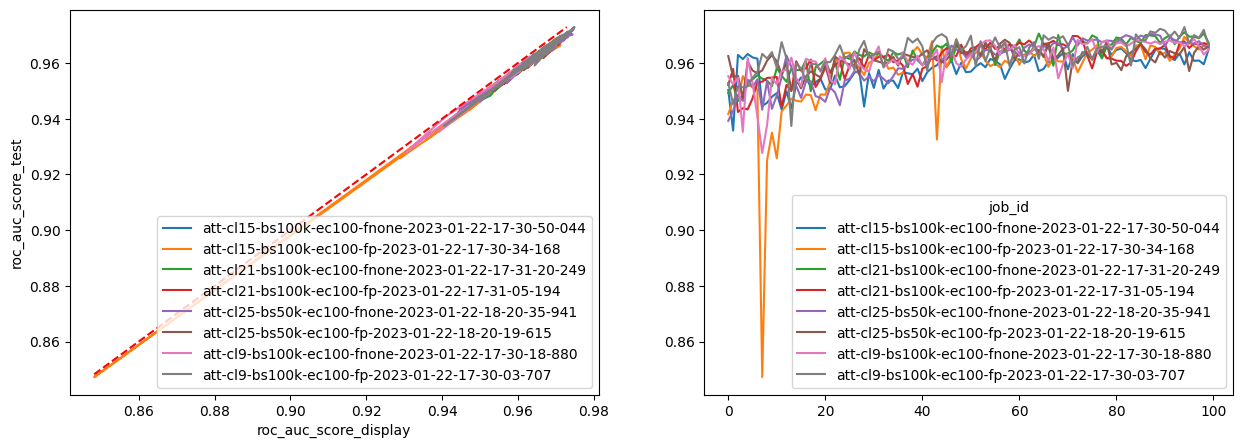

In [15]:
job_ids = ['att-cl25-bs50k-ec100-fnone-2023-01-22-18-20-35-941',
 'att-cl25-bs50k-ec100-fp-2023-01-22-18-20-19-615',
 'att-cl21-bs100k-ec100-fnone-2023-01-22-17-31-20-249',
 'att-cl21-bs100k-ec100-fp-2023-01-22-17-31-05-194',
 'att-cl15-bs100k-ec100-fnone-2023-01-22-17-30-50-044',
 'att-cl15-bs100k-ec100-fp-2023-01-22-17-30-34-168',
 'att-cl9-bs100k-ec100-fnone-2023-01-22-17-30-18-880',
 'att-cl9-bs100k-ec100-fp-2023-01-22-17-30-03-707',
]

df = loader.load_and_cache_metrics(job_ids)
two_plots(df)